# Exploration of Stream Flow and Precipitation Data
by Martha Burket, Carson DeSotel  
GEOG 5543  
Fall 2021

In [2]:
'''
    Installation:
    Run this cell to ensure that required packages are installed.
'''
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install climata

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
'''
    Imports:
    Run this cell to import required libraries.
'''
import pandas as pd
import matplotlib.pyplot as plt
import climata

In [4]:
'''
    Constants:
    Define constants for use through the Notebook.
'''

# Relevant codes for data are provided at reference [1], a short table of useful codes is at reference [2]
_PRECIPITATION = '00045'
_DISCHARGE     = '00060'

## What Data is Being Investigated?

We are going to be looking at Minnesota stream sites that are being measured by the USGS in their NWIS. Their website which includes site locator and all the data we'll be using is located [here](https://waterdata.usgs.gov/nwis). We're keeping this local to Minnesota, as Minnesota has a diverse collection of more urban and rural streams, as well as active stream flow research being done. 

This Notebook will be used to look at stream flow and precipitation for all Minnesota sites over distinct periods of time.

In [5]:
'''
    Display all sites of interest and their site number
'''

# apply converter to preserve leading zero in site code
sites = pd.read_csv('data/sites.csv', converters = {'SiteNumber': lambda x: str(x)})
print(sites[['SiteNumber', 'SiteName']])

   SiteNumber                                           SiteName
0    04024430              NEMADJI RIVER NEAR SOUTH SUPERIOR, WI
1    05132000                    BIG FORK RIVER AT BIG FALLS, MN
2    05207600  MISSISSIPPI RIVER AT WILLOW BEACH AT BALL CLUB...
3    05227500                    MISSISSIPPI RIVER AT AITKIN, MN
4    05289800  MINNEHAHA CREEK AT HIAWATHA AVE. IN MINNEAPOLI...
5    05301000             MINNESOTA RIVER NEAR LAC QUI PARLE, MN
6    05304500                      CHIPPEWA RIVER NEAR MILAN, MN
7    05311000                  MINNESOTA RIVER AT MONTEVIDEO, MN
8    05330000                    MINNESOTA RIVER NEAR JORDAN, MN
9    05333500                   ST. CROIX RIVER NEAR DANBURY, WI
10   05355024                      CANNON RIVER AT NORTHFIELD MN
11   05372995           SOUTH FORK ZUMBRO RIVER AT ROCHESTER, MN
12   05385000                        ROOT RIVER NEAR HOUSTON, MN
13   05386400               MISSISSIPPI RIVER AT BROWNSVILLE, MN


## Isolated Stream Flow and Precipitation of Minnehaha Creek

In [2]:
from climata.usgs import InstantValueIO

_site_code = '05289800'


### calls are split into 2 as this class only allows one parameter code to be passed in
flow_data = InstantValueIO(
    start_date = '2021-10-03', # arbitrary time in October
    end_date   = '2021-10-09',
    station    = _site_code,   # plug in Minehaha Creek Code
    parameter  = _DISCHARGE,   # plug in Discharge (ft^3 / s)
)

prec_data = InstantValueIO(
    start_date = '2021-10-03',     # arbitrary time in October
    end_date   = '2021-10-09',
    station    = _site_code,       # plug in Minehaha Creek Code
    parameter  = _PRECIPITATION,   # plug in Discharge (ft^3 / s)
)

### example code found at [3]
for flow_series in flow_data:
    flow    = [r[1] for r in flow_series.data]
    dates  = [r[0] for r in flow_series.data]
    
for prec_series in prec_data:
    prec  = [r[1] for r in prec_series.data]
    
plt.plot(dates, flow)
plt.plot(dates, prec)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title('Minehaha Creek')
plt.xticks(rotation='vertical')
plt.show()

NameError: name '_DISCHARGE' is not defined

In [8]:
'''
    Fetch example data from Minehaha Creek Collection Site
'''
import requests
USGS_IV_URL = 'http://waterservices.usgs.gov/nwis/iv/'

minehaha_site_code = '05289800'

payload = {'site'    : minehaha_site_code, 
           'format'  : 'json', 
           'startDT' : '2021-10-01', # start & end date must be in ISO-8601 Format (yyyy-mm-dd)
           'endDT'   : '2021-10-08',
          }

response = requests.get(USGS_IV_URL, params = payload)

data = response.json()

## Flows for All Streams in Our Scope

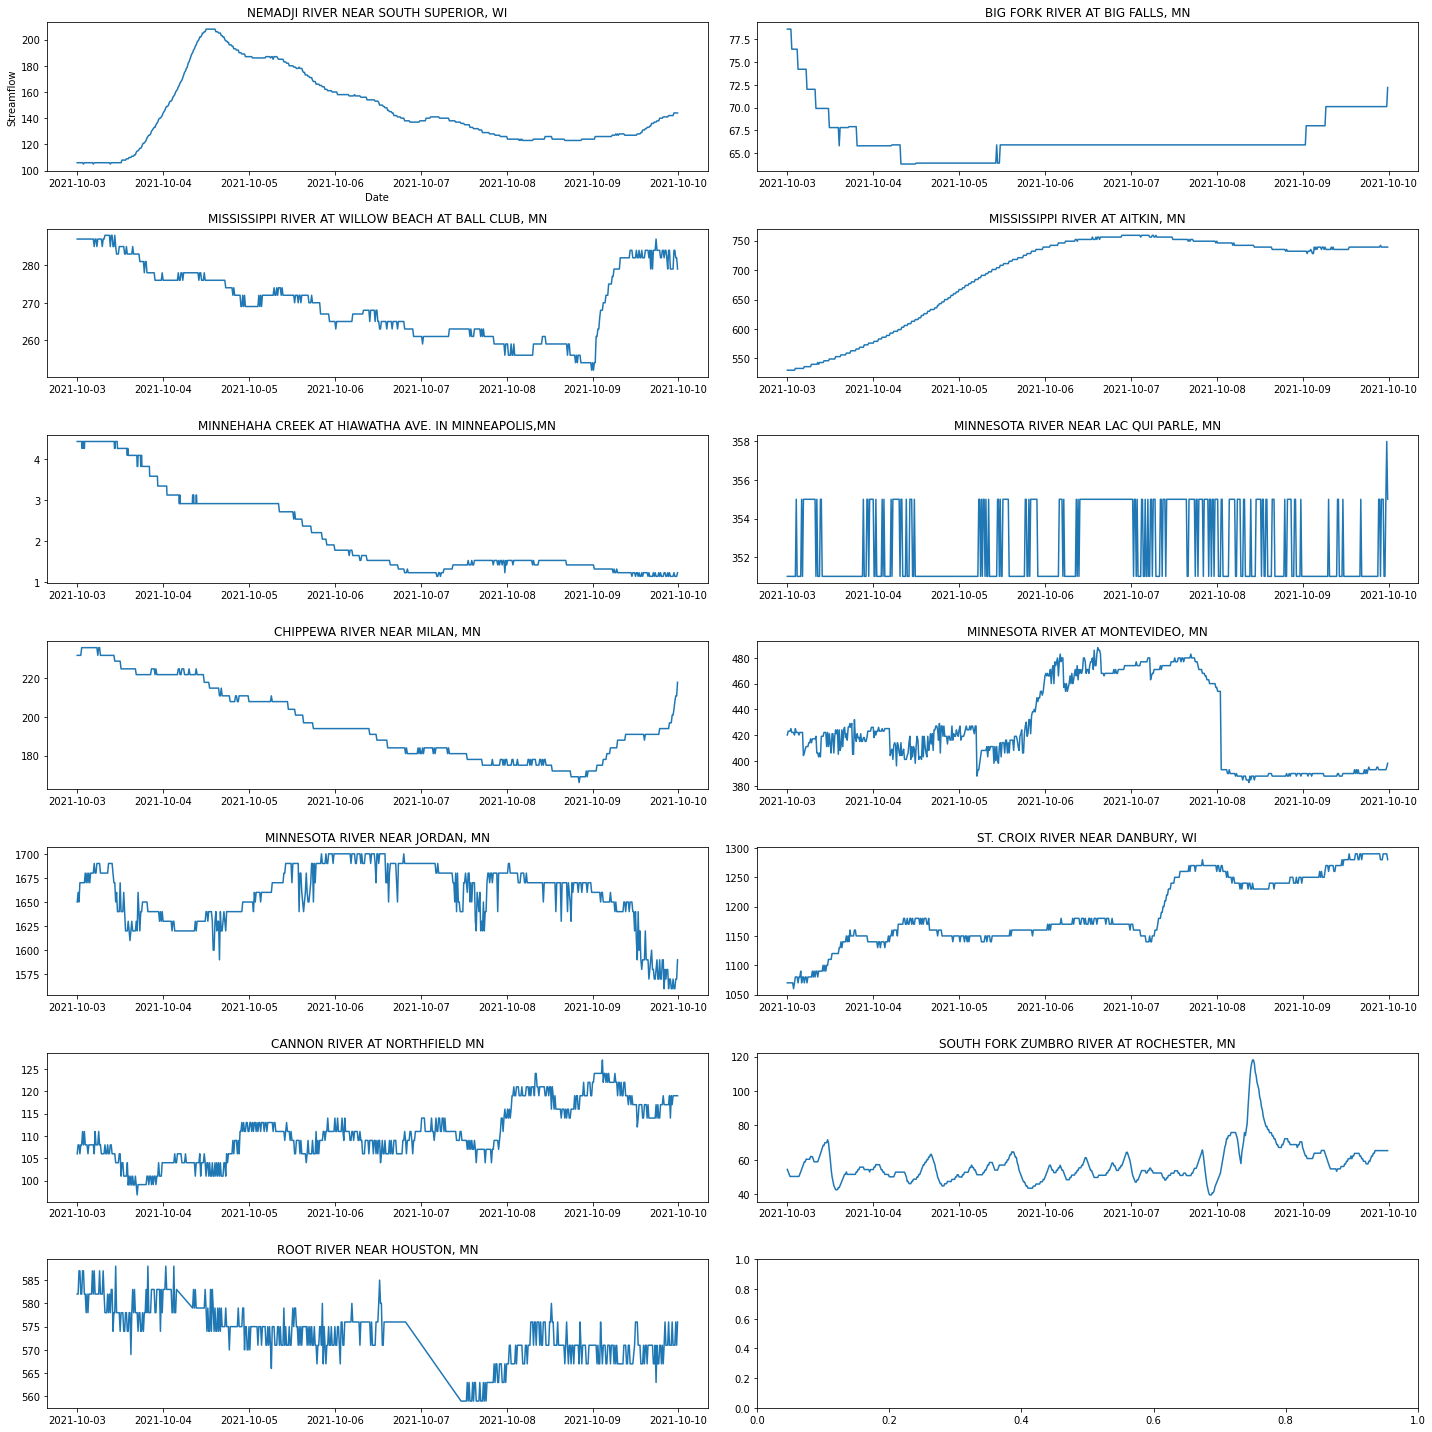

In [31]:
'''
    Read all discharge data from all sites
'''
import matplotlib.pyplot as plt

### Get all Site Codes and Names
sites = pd.read_csv('data/sites.csv', converters = {'SiteNumber': lambda x: str(x)})
sites = sites[['SiteNumber', 'SiteName']]

fig, axes = plt.subplots(nrows = 7,
                        ncols = 2, 
                        figsize = (20, 20))
ax = axes.ravel()

### Go through rows in sites
for index, row in sites.iterrows():
    site_code = row[0]
    site_name = row[1]
    
    # set up payload
    flow_data = InstantValueIO(
        start_date = '2021-10-03',     # arbitrary time in October
        end_date   = '2021-10-09',
        station    = site_code,        
        parameter  = _DISCHARGE,       # plug in Discharge (ft^3 / s)
    )
    
    # plot each flow series 
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]
        ax[index].set_title(site_name)
        ax[index].plot(dates, flow)     

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Streamflow')
plt.tight_layout()
plt.show()

As we can see here, there are certain streams with better resolutions of data, for example, the Mississippi River at Aitkin, and the South Fork Zumbro River all have very smooth graphs which could lead to better investigations into the stream data as a whole.

## Precipitation for all Streams  
This process is very similar to our measure of discharge. The only difference being the code we pass into the API call. 

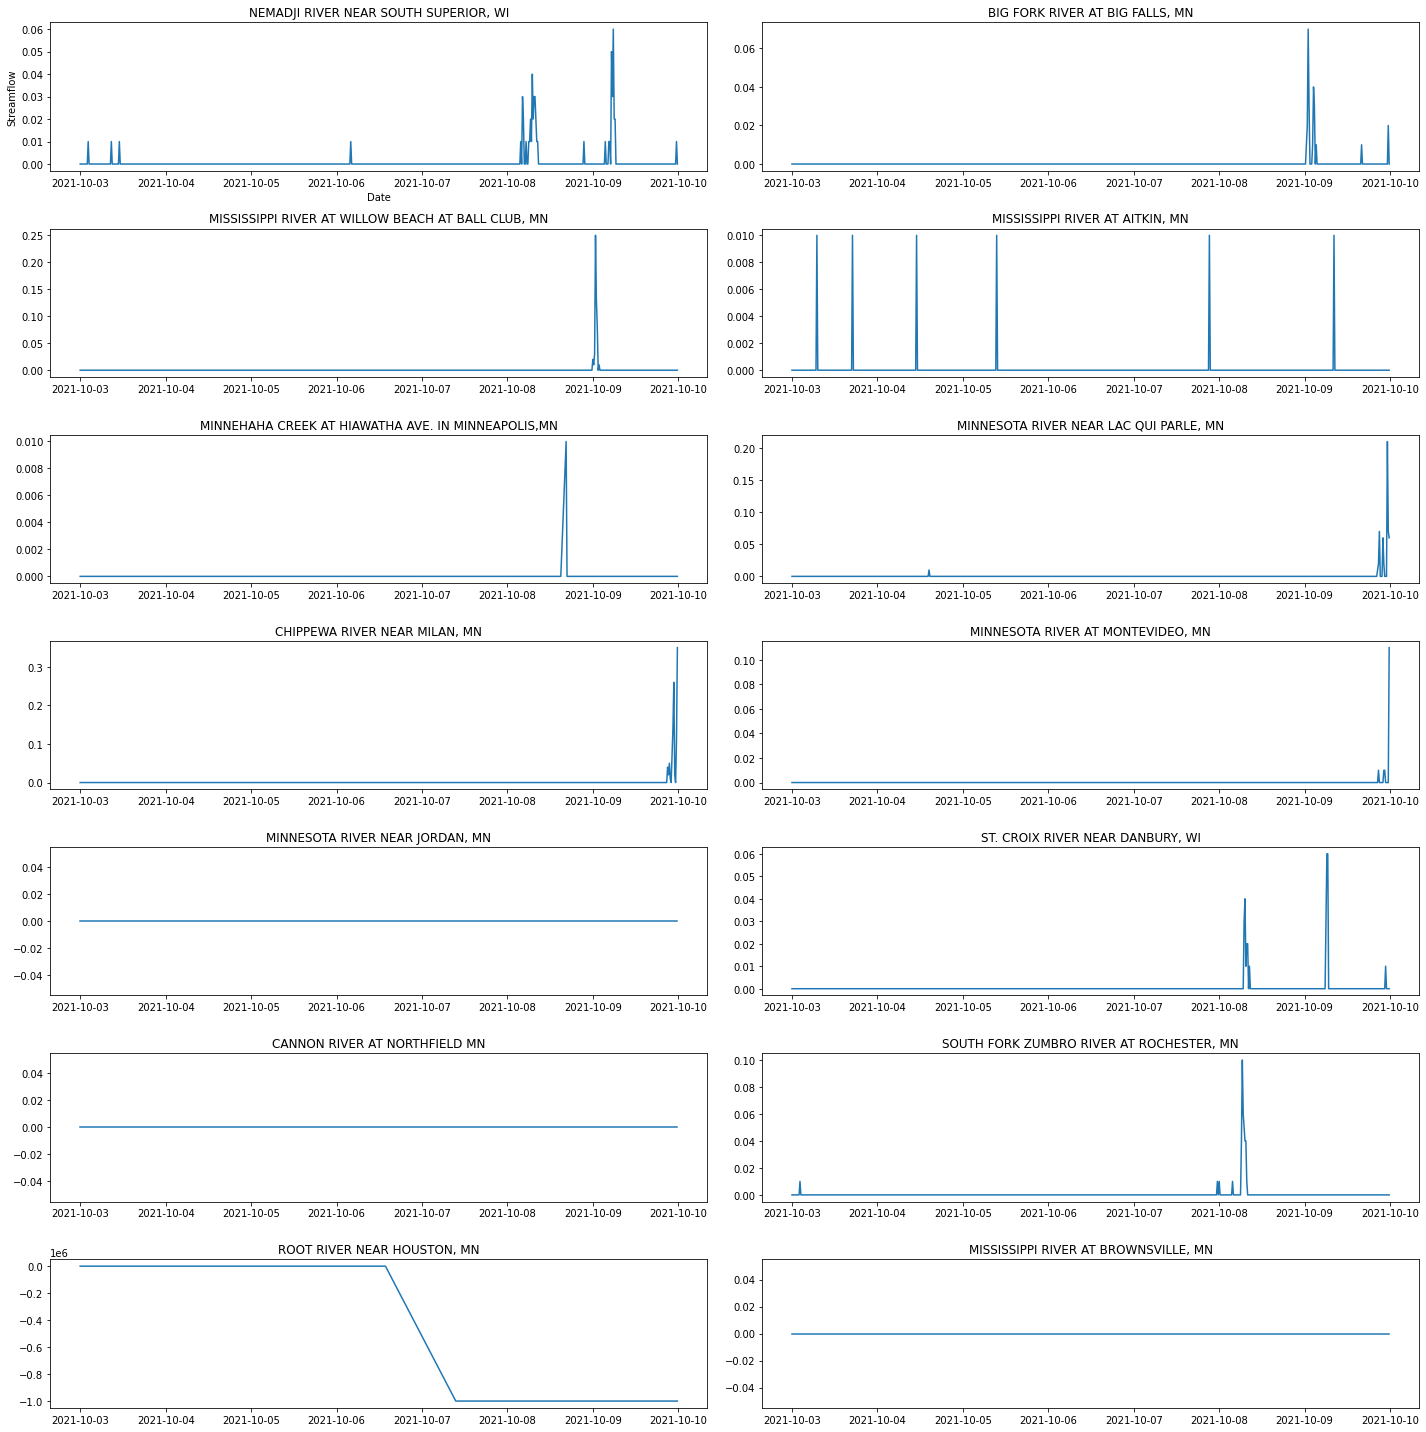

In [33]:
'''
    Read all precipitation data from all sites
'''
import matplotlib.pyplot as plt

### Get all Site Codes and Names
sites = pd.read_csv('data/sites.csv', converters = {'SiteNumber': lambda x: str(x)})
sites = sites[['SiteNumber', 'SiteName']]

fig, axes = plt.subplots(nrows = 7,
                        ncols = 2, 
                        figsize = (20, 20))
ax = axes.ravel()

### Go through rows in sites
for index, row in sites.iterrows():
    site_code = row[0]
    site_name = row[1]
    
    # set up payload
    flow_data = InstantValueIO(
        start_date = '2021-10-03',     # arbitrary time in October
        end_date   = '2021-10-09',
        station    = site_code,        
        parameter  = _PRECIPITATION,       # plug in Precipitation
    )
    
    # plot each flow series 
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]
        ax[index].set_title(site_name)
        ax[index].plot(dates, flow)     

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Streamflow')
plt.tight_layout()
plt.show()

## Overlay Precipitation on Discharge

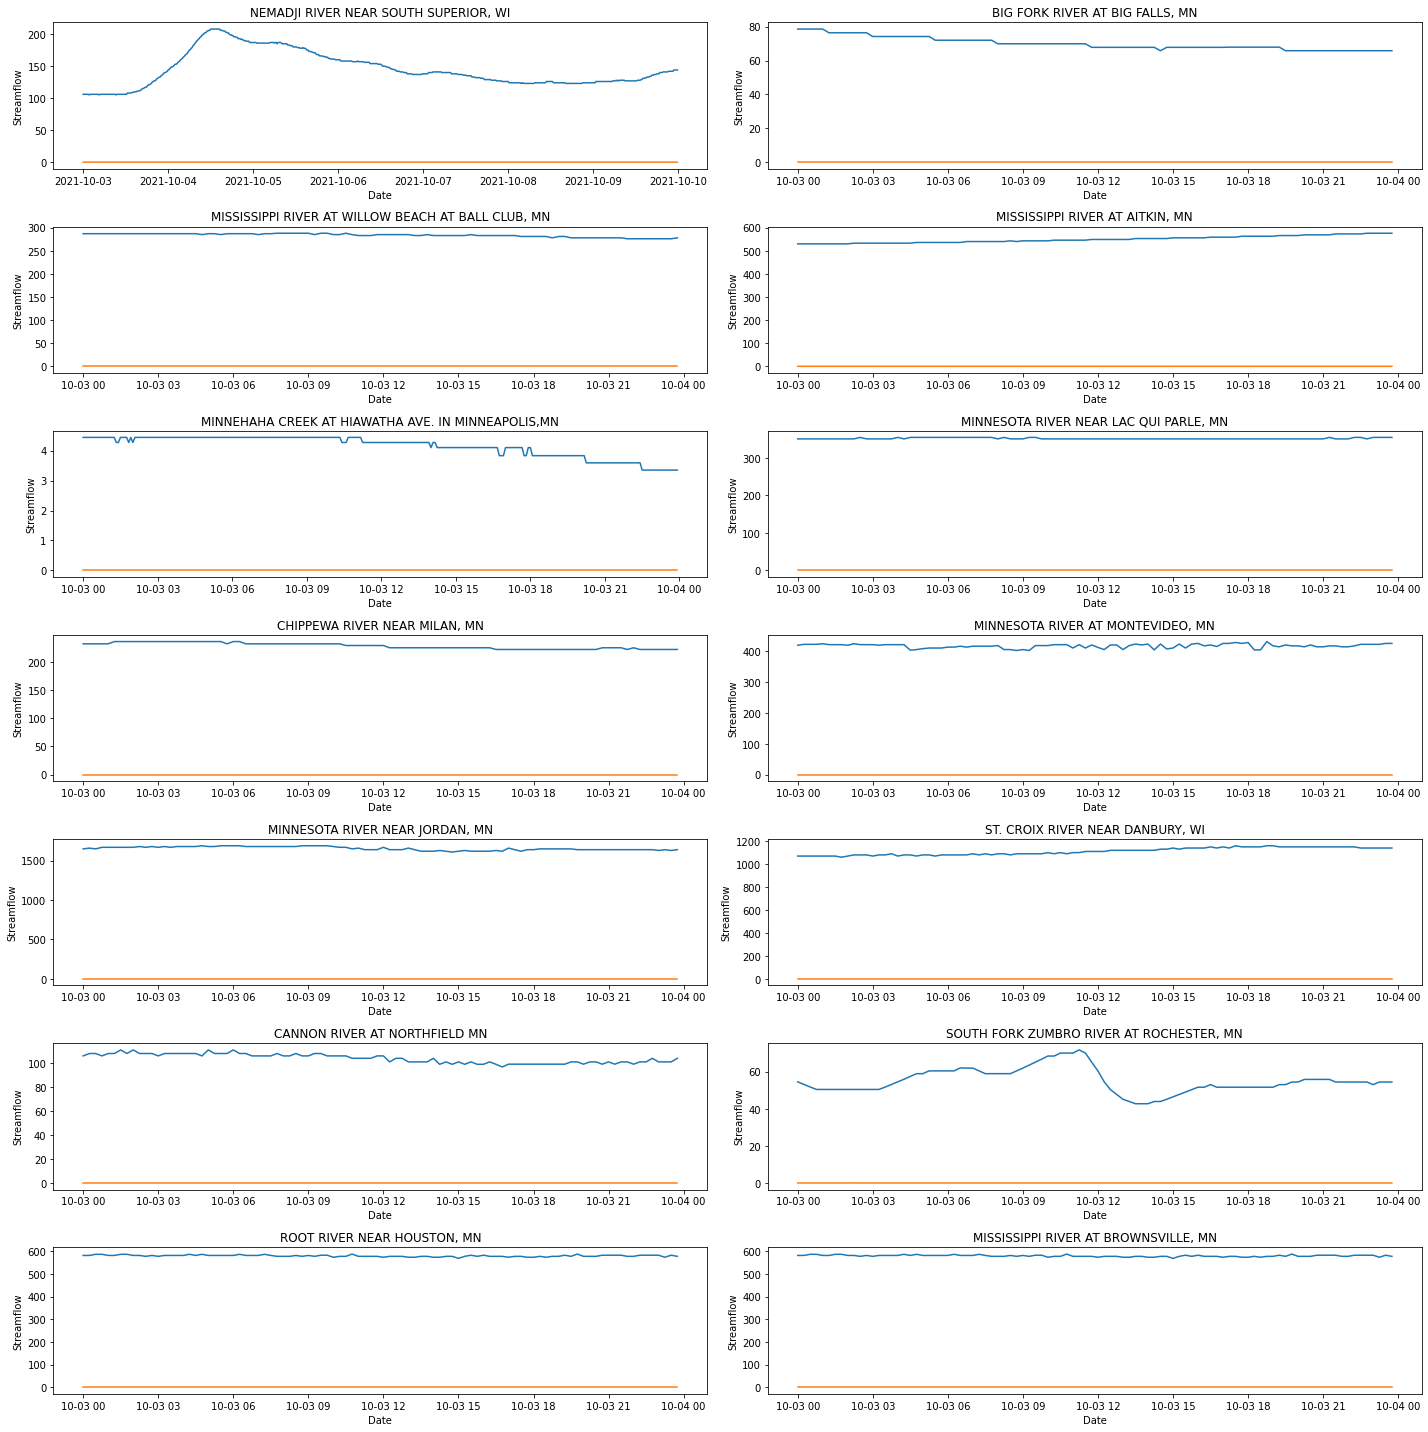

In [37]:
'''
    Overlay precipitation data over discharge data
'''
import matplotlib.pyplot as plt

### Get all Site Codes and Names
sites = pd.read_csv('data/sites.csv', converters = {'SiteNumber': lambda x: str(x)})
sites = sites[['SiteNumber', 'SiteName']]

fig, axes = plt.subplots(nrows = 7,
                        ncols = 2, 
                        figsize = (20, 20))
ax = axes.ravel()

### define date range
dates = [
    '2021-10-03',
    '2021-10-09'
]

### Go through rows in sites
for index, row in sites.iterrows():
    site_code = row[0]
    site_name = row[1]
    
    # set up payload
    flow_data = InstantValueIO(
        start_date = dates[0],             # arbitrary time in October
        end_date   = dates[1],
        station    = site_code,        
        parameter  = _DISCHARGE,           # plug in Discharge (ft^3 / s)
    )
    
    prec_data = InstantValueIO(
        start_date = dates[0],             # arbitrary time in October
        end_date   = dates[1],
        station    = site_code,        
        parameter  = _PRECIPITATION,       # plug in Precipitation
    )
    
    # plot each flow series 
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]
    for prec_series in prec_data:
        prec  = [r[1] for r in prec_series.data]
        dates = [r[0] for r in prec_series.data]

    ax[index].set_xlabel('Date')
    ax[index].set_ylabel('Streamflow')
    ax[index].set_title(site_name)
    ax[index].plot(dates, flow) 
    ax[index].plot(dates, prec)


plt.tight_layout()
plt.show()

The problem with this is that the amount of precipitation we get doesn't compare well to the amount of discharge measured. The graphs cannot be easily overlayed directly, and instead must be compared using a graph that shows them each as separate elements that are related.

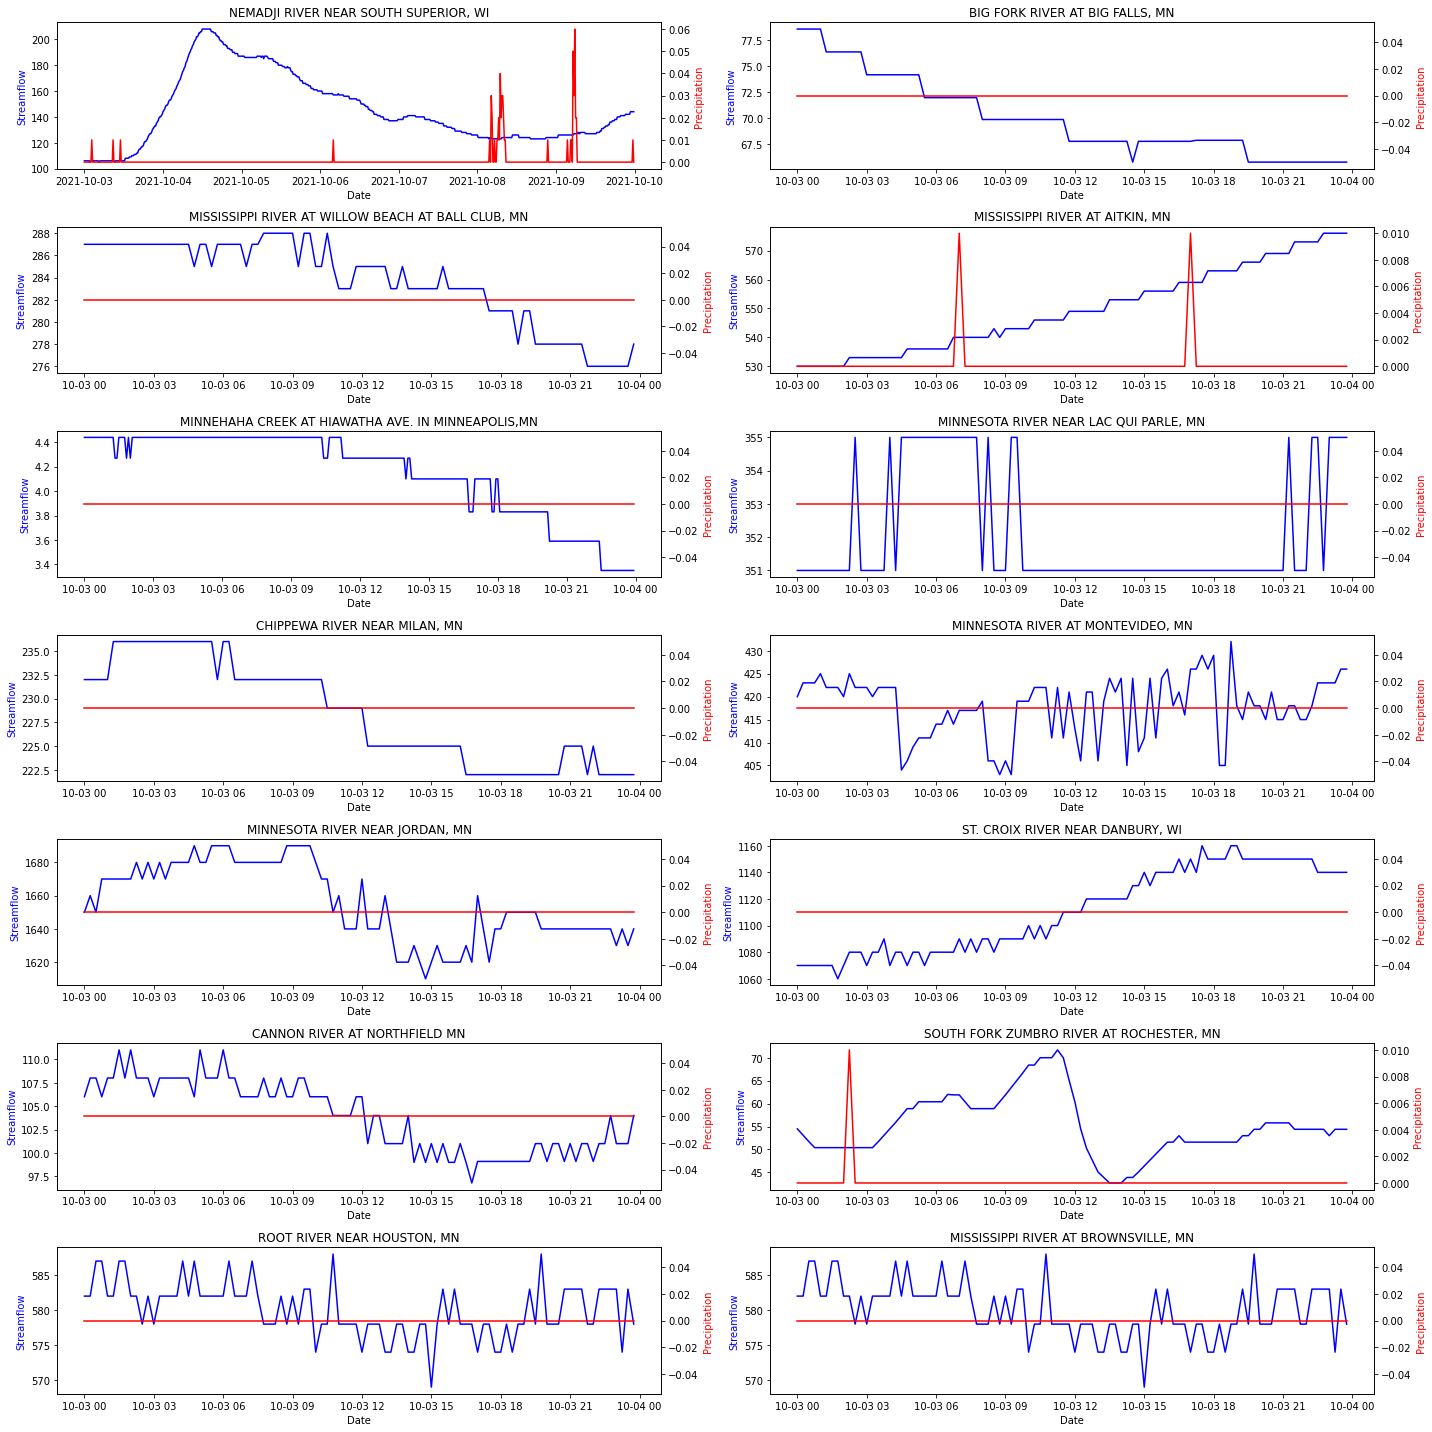

In [41]:
'''
    Overlay precipitation data over discharge data, show both y axes proporionally
'''
import matplotlib.pyplot as plt

### Get all Site Codes and Names
sites = pd.read_csv('data/sites.csv', converters = {'SiteNumber': lambda x: str(x)})
sites = sites[['SiteNumber', 'SiteName']]

fig, axes = plt.subplots(nrows = 7,
                        ncols = 2, 
                        figsize = (20, 20))
ax = axes.ravel()
### define date range
dates = [
    '2021-10-03',
    '2021-10-09'
]

### Go through rows in sites
for index, row in sites.iterrows():
    site_code = row[0]
    site_name = row[1]
    
    # set up payload
    flow_data = InstantValueIO(
        start_date = dates[0],             # arbitrary time in October
        end_date   = dates[1],
        station    = site_code,        
        parameter  = _DISCHARGE,           # plug in Discharge (ft^3 / s)
    )
    
    prec_data = InstantValueIO(
        start_date = dates[0],             # arbitrary time in October
        end_date   = dates[1],
        station    = site_code,        
        parameter  = _PRECIPITATION,       # plug in Precipitation
    )
    
    ### Extract Series From Data -- Prep for Plotting
    for flow_series in flow_data:
        flow    = [r[1] for r in flow_series.data]
        dates  = [r[0] for r in flow_series.data]
    for prec_series in prec_data:
        prec  = [r[1] for r in prec_series.data]
        dates = [r[0] for r in prec_series.data]

    ### Plot Discharge
    ax[index].set_xlabel('Date')
    ax[index].set_ylabel('Streamflow', color='blue')
    ax[index].set_title(site_name)
    ax[index].plot(dates, flow, color='blue') 

    ### Plot Precipitation
    ### Twin Axes derived from [5]
    ax2 = ax[index].twinx()
    ax2.set_ylabel('Precipitation', color='red')
    ax2.plot(dates, prec, color='red')


plt.tight_layout()
plt.show()

It seems that not all sensors will collect precipitation data, but for the sensors that do, we may be able to show a correlation between precipitation and an increased discharge in the streamflow. 

## Recommendation
Based on the quality and precision of both the discharge and precipitation data present in the above graphs, I'd recommend using the Nemadji River or South Fork Zumbro River.

## References:
[1] https://help.waterdata.usgs.gov/code/parameter_cd_query?fmt=rdb&group_cd=PHY&inline=true  
[2] https://cran.r-project.org/web/packages/dataRetrieval/vignettes/dataRetrieval.html  
[3] https://www.earthdatascience.org/tutorials/acquire-and-visualize-usgs-hydrology-data/  
[4] https://github.com/heigeo/climata/blob/master/climata/usgs/__init__.py   
[5] https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/  